<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [ ]:
0.6 

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, I do not agree with him. Addtional information changes the probability. 

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, under which two events the knight cannot cross safely after a troll was captured?

E1 and E2 

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [71]:
#E1

#P(E1)=> event 1 
P_E1 = 0.2 
#P(E2)=> ecent 2 
P_E2 = 0.2
#P(E3) = event3  
P_E3= 0.6
#P(T) => encountering a troll
P_TE1 = 0.4 #2/5
P_TE2 = 0.2 #1/5 
P_TE3 = 0 
#P(E1|T) = P(T|E1)*P(E1)/[P(T|E1)*P(E1)+P(T|E2)*P(E2)+P(T|E3)*P(E3)]
P_E1T = P_TE1*P_E1/(P_TE1*P_E1+P_TE2*P_E2+P_TE3*P_E3)







0.6666666666666666

Probability of the other event given a troll captured: 

In [73]:
#E2

#P(E1)=> event 1 
P_E1 = 0.2 
#P(E2)=> ecent 2 
P_E2 = 0.2
#P(E3) = event3  
P_E3= 0.6
#P(T) => encountering a troll
P_TE1 = 0.4 #2/5
P_TE2 = 0.2 #1/5 
P_TE3 = 0 
#P(E2|T) = P(T|E2)*P(E1)/[P(T|E1)*P(E1)+P(T|E2)*P(E2)+P(T|E3)*P(E3)]
P_E2T = P_TE2*P_E2/(P_TE1*P_E1+P_TE2*P_E2+P_TE3*P_E3)

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [ ]:
1/3 = 0.333

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [25]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [26]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [74]:
#1.
x = -10:10 
collect(x)

21-element Vector{Int64}:
 -10
  -9
  -8
  -7
  -6
  -5
  -4
  -3
  -2
  -1
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10

In [75]:
#2.
y_true = x.^2 + 3 * x .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [76]:
#1.
dataerr = 10.0 
G_noises = di.Normal(0,dataerr)

Distributions.Normal{Float64}(μ=0.0, σ=10.0)

In [67]:
#2.
y_observed = y_true .+ rand(G_noises,length(x))  

21-element Vector{Float64}:
  63.33404180139726
  54.98202939640667
  51.74556630687148
  11.03493870761913
   5.111854223385665
 -11.882514552810552
   4.7205173766301
 -21.624728887966793
  -0.6947047485228977
 -17.831099055991707
  15.175306800005675
   7.709320867222383
 -11.53303729624907
  21.57069002303478
  34.11709144944528
  44.030572133905466
  43.066364551804426
  80.9104481994234
  80.67740248219599
  80.71512543933609
 125.09601223592203

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

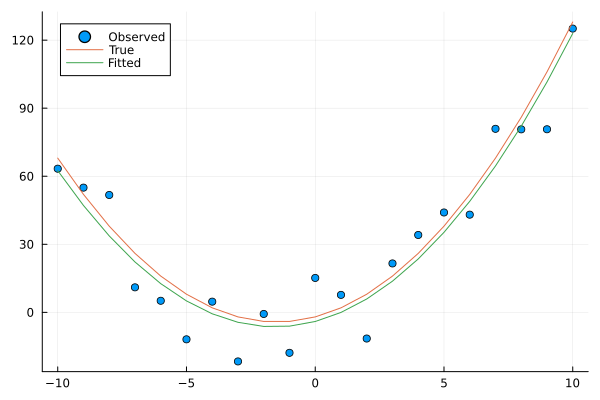

In [82]:
using Polynomials

line_fit =fit(x,y_observed,2)
fit_coeffs = coeffs(line_fit)
y_fitted = fit_coeffs[1] .+ fit_coeffs[2] .*x .+ fit_coeffs[3] .*x .^2 

using Plots

scatter(x,y_observed,label = "Observed")
plot!(x,y_true,label = "True" )
plot!(x,y_fitted,label = "Fitted")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

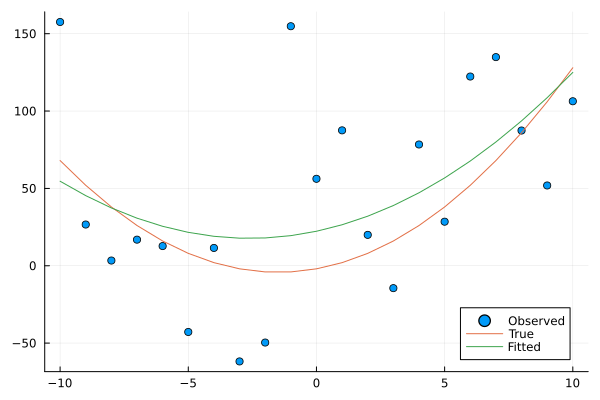

In [87]:
dataerr2 = 50.0 
G_noises2 = di.Normal(0,dataerr2)
y_observed2 = y_true + rand(G_noises2,length(x))

using Polynomials

line_fit2 =fit(x,y_observed2,2)
fit_coeffs2 = coeffs(line_fit2)
y_fitted2 = fit_coeffs2[1] .+ fit_coeffs2[2] .*x .+ fit_coeffs2[3] .*x .^2 


using Plots
scatter(x,y_observed2,label = "Observed")
plot!(x,y_true,label = "True" )
plot!(x,y_fitted2,label = "Fitted")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The plot is further to y_true than the plot in 2.3 since noise is larger, which means the scatter is more spread out. 

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


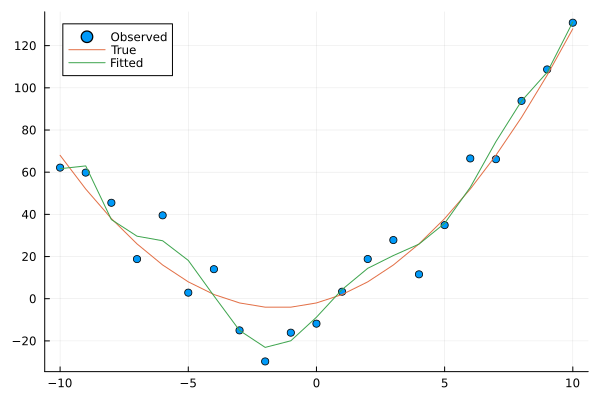

In [98]:
dataerr = 10.0 
G_noises = di.Normal(0,dataerr)
y_observed = y_true .+ rand(G_noises,length(x))

using Polynomials
line_fit3 =fit(x,y_observed,10)
fit_coeffs3 = coeffs(line_fit3)
y_fitted3 = line_fit3.(x)

using Plots
scatter(x,y_observed,label = "Observed")
plot!(x,y_true,label = "True" )
plot!(x,y_fitted3,label = "Fitted")



### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


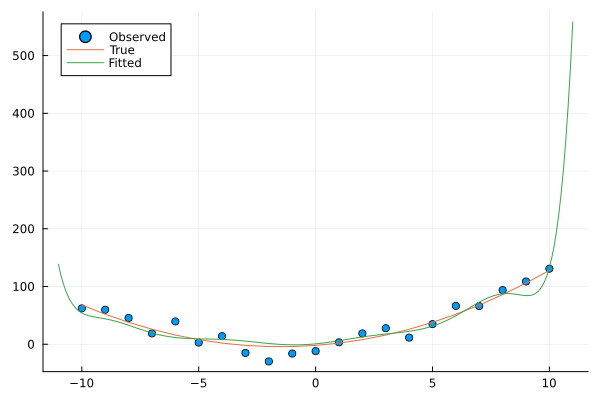

In [101]:
x_fit  = -11:0.1:11
collect(x_fit)


using Polynomials
line_fit =fit(x,y_observed,10)
fit_coeffs = coeffs(line_fit)
y_fitted = line_fit.(x_fit)

using Plots
scatter(x,y_observed,label = "Observed")
plot!(x,y_true,label = "True" )
plot!(x_fit,y_fitted4,label = "Fitted")




3. What do you observe in the plot? What is this phenomenon called?

The fit line went over the scatter of observed data points. This phenomenon is called "overfitting". 